# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import sem
import statsmodels.stats.api as sms
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The sample data of charges is a non-normal distribution heavily skewed to the right.  The sample mean is \\$13,270 and the sample standard deviation is \\$12,110.  Charges range from a minimum of \\$1122 to a maximum of \\$63,770 for the 1338 samples.  The mean and standard deviation of the data are not appropriate statistics to base assumptions on as they are heavily skewed by a relatively small number of high charges.

In [4]:
chargepop_mean_est = medical['charges'].mean()
chargepop_std_est = medical['charges'].std(ddof=1)
charges_min = medical['charges'].min()
charges_max = medical['charges'].max()
print('The following are the sample statistics for charges: ')
print('   mean = ' + str(chargepop_mean_est))
print('   std  = ' + str(chargepop_std_est))
print('   min  = ' + str(charges_min))
print('   max  = ' + str(charges_max))

The following are the sample statistics for charges: 
   mean = 13270.422265141257
   std  = 12110.011236693994
   min  = 1121.8739
   max  = 63770.42801


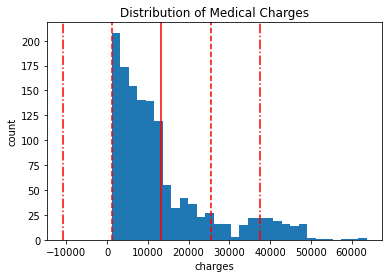

In [5]:
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Medical Charges')
_ = plt.axvline(chargepop_mean_est, color='r')
_ = plt.axvline(chargepop_mean_est+chargepop_std_est, color='r', linestyle='--')
_ = plt.axvline(chargepop_mean_est-chargepop_std_est, color='r', linestyle='--')
_ = plt.axvline(chargepop_mean_est+(2*chargepop_std_est), color='r', linestyle='-.')
_ = plt.axvline(chargepop_mean_est-(2*chargepop_std_est), color='r', linestyle='-.')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The administrators concern that the actual average charge has fallen below \\$12,000 can analyzed using the Central Limit Theorem to apply frequentist inference.  Since we do not know the true population standard deviation, it would be appropriate to test the theory with a t distribution of the sample mean.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The hypothesis that the administrator is concerned about is whether the actual average charge has fallen below \\$12,000, therefore a one-sided interval would be appropriate to test the hypothesis.  By using a 95% confidence interval, we can be 95% confident that the population mean of the charges is above the lower bound of \\$12,725.

In [6]:
charges = medical['charges'].to_numpy()
pop_mean_est = np.mean(charges)
pop_std_est = np.std(charges, ddof=1)
sample_size = len(charges)
print('The following are the statistics for the distribution of sample mean of charges: ')
print('   mean = ' + str(pop_mean_est))
print('   std  = ' + str(pop_std_est))
print('   size = ' + str(sample_size))

The following are the statistics for the distribution of sample mean of charges: 
   mean = 13270.422265141257
   std  = 12110.011236694001
   size = 1338


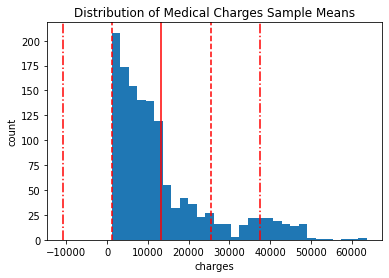

In [7]:
_ = plt.hist(charges, bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Medical Charges Sample Means')
_ = plt.axvline(pop_mean_est, color='r')
_ = plt.axvline(pop_mean_est + pop_std_est, color='r', linestyle='--')
_ = plt.axvline(pop_mean_est - pop_std_est, color='r', linestyle='--')
_ = plt.axvline(pop_mean_est + (2*pop_std_est), color='r', linestyle='-.')
_ = plt.axvline(pop_mean_est - (2*pop_std_est), color='r', linestyle='-.')

In [8]:
# Calculate t-score for a 95% confidence interval and 1337 degrees of freedom (df) which is one less than the sample size
t_value = t.ppf(0.95, sample_size - 1)
t_value

1.6459941145571317

#### Manual Calculation

In [9]:
# Calculate Margin of Error
moe = t_value * (pop_std_est / np.sqrt(sample_size))
moe

544.9350813250254

In [10]:
# Calculate Interval
lower_limit = pop_mean_est - moe
upper_limit = pop_mean_est + moe
lower_limit, upper_limit

(12725.48718381623, 13815.357346466282)

#### scypi.stats.t.interval Calculation

In [11]:
# Standard Error = Standard Deviation of Sample divided by the square root of the sample size
# std_error = pop_std_est / np.sqrt(sample_size)
# Use scipy.stats.sem (standard error of mean)
std_error = sem(charges, ddof=1)
std_error

331.0674543156824

In [12]:
t.interval(0.90, sample_size-1, loc=pop_mean_est, scale=std_error)

(12725.48718381623, 13815.357346466282)

#### statsmodels.stats.api Calculation

In [13]:
sms.DescrStatsW(charges).tconfint_mean(alpha=0.10)

(12725.48718381623, 13815.357346466282)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that people with insurance are charged the same amount as people without.
The alternative hypothesis is that people with insurance are charged a different amount than people without.
We are assuming that the two groups have equal variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

### Extract charges for people WITH insurance

In [14]:
charges_ins_y = medical[medical['insuranceclaim']==1].charges.to_numpy()
charges_ins_y_pop_mean_est = np.mean(charges_ins_y)
charges_ins_y_pop_std_est = np.std(charges_ins_y, ddof=1)
charges_ins_y_sample_size = len(charges_ins_y)
print('The following are the statistics of charges for people with insurance: ')
print('   mean = ' + str(charges_ins_y_pop_mean_est))
print('   std  = ' + str(charges_ins_y_pop_std_est))
print('   size = ' + str(charges_ins_y_sample_size))

The following are the statistics of charges for people with insurance: 
   mean = 16423.928276537677
   std  = 14045.928418802134
   size = 783


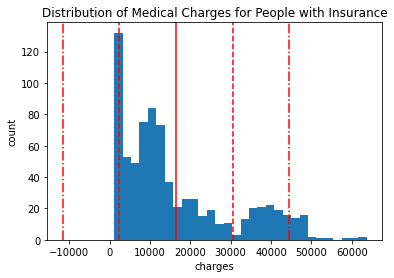

In [15]:
_ = plt.hist(charges_ins_y, bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Medical Charges for People with Insurance')
_ = plt.axvline(charges_ins_y_pop_mean_est, color='r')
_ = plt.axvline(charges_ins_y_pop_mean_est + charges_ins_y_pop_std_est, color='r', linestyle='--')
_ = plt.axvline(charges_ins_y_pop_mean_est - charges_ins_y_pop_std_est, color='r', linestyle='--')
_ = plt.axvline(charges_ins_y_pop_mean_est + (2*charges_ins_y_pop_std_est), color='r', linestyle='-.')
_ = plt.axvline(charges_ins_y_pop_mean_est - (2*charges_ins_y_pop_std_est), color='r', linestyle='-.')

### Extract charges for people WITHOUT insurance

In [16]:
charges_ins_n = medical[medical['insuranceclaim']==0].charges.to_numpy()
charges_ins_n_pop_mean_est = np.mean(charges_ins_n)
charges_ins_n_pop_std_est = np.std(charges_ins_n, ddof=1)
charges_ins_n_sample_size = len(charges_ins_n)
print('The following are the statistics for the distribution of charges for people without insurance: ')
print('   mean = ' + str(charges_ins_n_pop_mean_est))
print('   std  = ' + str(charges_ins_n_pop_std_est))
print('   size = ' + str(charges_ins_n_sample_size))

The following are the statistics for the distribution of charges for people without insurance: 
   mean = 8821.421892306305
   std  = 6446.510126811738
   size = 555


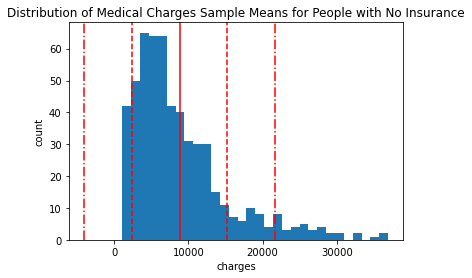

In [17]:
_ = plt.hist(charges_ins_n, bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Medical Charges Sample Means for People with No Insurance')
_ = plt.axvline(charges_ins_n_pop_mean_est, color='r')
_ = plt.axvline(charges_ins_n_pop_mean_est + charges_ins_n_pop_std_est, color='r', linestyle='--')
_ = plt.axvline(charges_ins_n_pop_mean_est - charges_ins_n_pop_std_est, color='r', linestyle='--')
_ = plt.axvline(charges_ins_n_pop_mean_est + (2*charges_ins_n_pop_std_est), color='r', linestyle='-.')
_ = plt.axvline(charges_ins_n_pop_mean_est - (2*charges_ins_n_pop_std_est), color='r', linestyle='-.')

### Calculate Degrees of Freedom and Critical Value for 95% Confidence Interval

In [18]:
# degrees of freedom
df = charges_ins_y_sample_size + charges_ins_n_sample_size - 2
# calculate the critical value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)
print('df=%d, cv=%.3f' % (df, cv))

df=1336, cv=1.646


### Manual Calculation of t-stat and p-value
Using formula provided in question Q4 above

In [19]:
# Pooled Standard Deviation of the Two Groups
var_y = ((charges_ins_y_sample_size - 1)*(charges_ins_y_pop_std_est**2))
var_n = ((charges_ins_n_sample_size - 1)*(charges_ins_n_pop_std_est**2))
pool_std = np.sqrt((var_y + var_n) / df)
pool_std

11520.034268775262

In [20]:
# Calculate t-statistic
mean_diff = charges_ins_n_pop_mean_est - charges_ins_y_pop_mean_est
size_yn_prop = (1 / charges_ins_n_sample_size) + (1 / charges_ins_y_sample_size)
t_yn_calc = mean_diff / (pool_std * np.sqrt(size_yn_prop))
# calculate the p-value
p_yn_calc = t.cdf(t_yn_calc, df) * 2.0
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_yn_calc, df, cv, p_yn_calc))
print('p=' + str(p_yn_calc))

t=-11.893, df=1336, cv=1.646, p=0.000
p=4.461230231620972e-31


In [21]:
# interpret via critical value
if abs(t_yn_calc) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [22]:
# interpret via p-value
if p_yn_calc > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


### Use scipy.stats.ttest_ind Calculation of t-stat and p-value

In [23]:
t_yn_scipy, p_yn_scipy = ttest_ind(charges_ins_n, charges_ins_y, equal_var=True)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_yn_scipy, df, cv, p_yn_scipy))
print('p=' + str(p_yn_scipy))

t=-11.893, df=1336, cv=1.646, p=0.000
p=4.461230231620717e-31


In [24]:
# interpret via critical value
if abs(t_yn_scipy) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [25]:
# interpret via p-value
if p_yn_scipy > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ It does not appear that the scipy.stats package has any equivalent functions to scipy.stats.t.ttest_ind for z-test to compare the means of two independent samples of scores.  However, it does seem to be available in the statsmodels.stats.weightstats.CompareMeans.ztest_ind package.  

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test